# Problem in plain English

Computer Parts Ltd., a computer hardware manufacturer make two types of products, keyboards and mice. Each unit of keyboards takes 1.5 hours to make and yields €50 in profit. On the other hand each unit of mice takes 1 hour to make, but only yields €37 in profit.

Computer Parts Ltd. recently signed a contract with a local wholesaler guaranteeing the production of at least 7 units of keyboards per day and 8 units of mice. Also, in order to satisfy supply and demand, Computer Parts Ltd have agreed to produce no more than twice the number of mice as there are keyboards.

A recent contract with the workers union also states that Computer Parts Ltd. can have no more than 25 labour hours per day.

How many units of keyboards and mice should computer parts limited make per day in order to maximise their profits given their contractual obligations?


# Formulate as  linear programming problem

Let us say that:

- $x_1 = $ The number (in units) of keyboards to produce
- $x_2 = $ The number (in units) of mice to produce

Since we want to maximise the profits, we can define the objetive function $z$ as:

Max $z = 50x_1 + 37x_2$

Subject to the following constraints:

$x_1 \ge 7$ (At least 7 keyboards)

$x_2 \ge 8$ (At least 8 mice)

$x_2 \le 2x_1$ (supply and demand)

$1.5x_1 + x_2 \le 25 $ (labour hours)

# Plot constraints

Before we solve this problem using PuLP, let's plot each of the constraints and take a look at the feasible reigon visually.

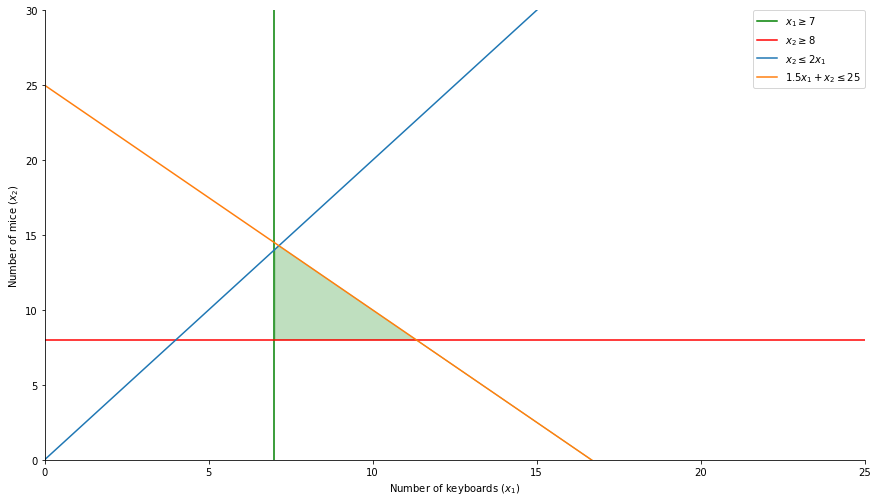

In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# draw constraints
plt.axvline(7, color='g', label=r'$x_1 \geq 7$') # constraint 1
plt.axhline(8, color='r', label=r'$x_2 \geq 8$') # constraint 2
plt.plot(x_1, (2*(x_1)), label=r'$x_2 \leq 2x_1$') # constraint 3
plt.plot(x_1, 25 - (1.5*x_1), label=r'$1.5x_1 + x_2 \leq 25$') # constraint 4


plt.xlim((0, 25))
plt.ylim((0, 30))
plt.xlabel(r'Number of keyboards ($x_1$)')
plt.ylabel(r'Number of mice ($x_2$)')

# fill in the fesaible region
plt.fill_between(x_1, np.minimum(25 - (1.5*x_1), (2*(x_1))), np.minimum(25 - (1.5*x_1), 8), 
                 where=x_1 >= 7,
                 color='green', alpha=0.25)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Solve using PuLP

Now that we have an idea for of what sort of sultion to expect, lets solve the problem using PuLP!

You will that see that the optimal solution is to create 8 units of keyboards, and 13 units of mice. This will yield Computer Parts Ltd. €837 euro in profit!

In [ ]:
# set the objective function for the model
model += (50 * x_1) + (37 * x_2)

In [158]:
from pulp import LpMaximize, LpProblem, LpVariable

# first create a model object
model = LpProblem(name="computer_parts_problem", sense=LpMaximize)

# declare our variables (note we are setting the low bound here so we dont have to add them as constraints)
# note we set the variable type to int so we dont get flots in solution (not practical for production)
x_1 = LpVariable(name="x_1", lowBound=7, cat="Integer")
x_2 = LpVariable(name="x_2", lowBound=8, cat="Integer")

# set the objective function for the model
model += (50 * x_1) + (37 * x_2)

# now we can add our constraints
model += (x_2 <= 2 * x_1, "supply_and_demand")
model += ((1.5 * x_1) + x_2 <= 25, "labour_hours")

# take a look at the model
print(model)

computer_parts_problem:
MAXIMIZE
50*x_1 + 37*x_2 + 0
SUBJECT TO
supply_and_demand: - 2 x_1 + x_2 <= 0

labour_hours: 1.5 x_1 + x_2 <= 25

VARIABLES
7 <= x_1 Integer
8 <= x_2 Integer



In [163]:
# solve the model
solution = model.solve()

# print the solution
for variable in model.variables():
    print(f"Optimal value for {variable.name} is {variable.value()}")
    
print(f"\nThis will yield a total profit of €{model.objective.value()}")

Optimal value for x_1 is 8.0
Optimal value for x_2 is 13.0

This will yield a total profit of €881.0
